# **Data Loading**

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# libraries that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
# load customers data
customers = pd.read_excel('/content/drive/MyDrive/Google Cloud/Sales Data Analysis/Dataset/Sales.xlsx', sheet_name = 'Customers')
customers.head()

,Customer Index,Customer Names
0,1,Avon Corp
1,2,WakeFern
2,3,"Elorac, Corp"
3,4,ETUDE Ltd
4,5,Procter Corp


In [ ]:
customers.shape

(50, 2)

In [ ]:
# load products data
products = pd.read_excel('/content/drive/MyDrive/Google Cloud/Sales Data Analysis/Dataset/Sales.xlsx', sheet_name = 'Products')
products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
products.shape

(15, 2)

In [ ]:
# load regions data
regions = pd.read_excel('/content/drive/MyDrive/Google Cloud/Sales Data Analysis/Dataset/Sales.xlsx', sheet_name = 'Regions')
regions.head()

,Index,Suburb,City,postcode,Longitude,Latitude,Full Address
0,1,Freemans Bay,Auckland,1011,174.748652,-36.855732,"Picton Street, Freemans Bay, Auckland"
1,2,Nightcaps,Southland,9630,168.028823,-45.970300,"Lyne Street, Nightcaps, Southland"
2,3,Northcote,North Shore,627,174.755505,-36.804712,"McBreen Avenue, Northcote, North Shore"
3,4,Bay View,Napier,4104,176.871662,-39.440389,"Ferguson Street South, Bay View, Napier"
4,5,Parklands,Christchurch,8083,172.705997,-43.472699,"Forest Drive, Parklands, Christchurch"


In [ ]:
regions.shape

(100, 7)

In [ ]:
# load orders data
orders = pd.read_excel('/content/drive/MyDrive/Google Cloud/Sales Data Analysis/Dataset/Sales.xlsx', sheet_name = 'Sales Orders')
orders.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,2499.1,1824.343,14994.6
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,2351.7,1269.918,25868.7
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,1728.6,1019.874,8643.0
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,USD,AXW291,29,7,6,978.2,684.740,5869.2
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,2338.3,1028.852,16368.1


In [ ]:
orders.shape

(7991, 13)

# **Data Exploration and Joining**

In [ ]:
# check out the columns of the loaded datasets
customers.columns, products.columns, regions.columns, orders.columns

(Index(['Customer Index', 'Customer Names'], dtype='object'),
 Index(['Index', 'Product Name'], dtype='object'),
 Index(['Index', 'Suburb', 'City', 'postcode', 'Longitude', 'Latitude',
        'Full Address'],
       dtype='object'),
 Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
        'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
        'Product Description Index', 'Order Quantity', 'Unit Price',
        'Total Unit Cost', 'Total Revenue'],
       dtype='object'))

In [ ]:
# check the datatypes of the primary and foreign keys
 (customers['Customer Index'].dtypes, orders['Customer Name Index'].dtypes), \
(products['Index'].dtypes, orders['Product Description Index'].dtypes), \
(regions['Index'].dtypes, orders['Delivery Region Index'].dtypes)

((dtype('int64'), dtype('int64')),
 (dtype('int64'), dtype('int64')),
 (dtype('int64'), dtype('int64')))

**Entities:**
1. **Orders** (Contains customer, product, and region references)  
2. **Customers** (Linked to orders via `Customer Index`)  
3. **Products** (Linked to orders via `Product Description Index`)  
4. **Regions** (Linked to orders via `Delivery Region Index`)  

**Relationships:**
- **Orders → Customers** (`Customer Name Index` in Orders links to `Customer Index` in Customers)  
- **Orders → Products** (`Product Description Index` in Orders links to `Index` in Products)  
- **Orders → Regions** (`Delivery Region Index` in Orders links to `Index` in Regions)  

In [ ]:
# Merging the 'orders' table with the 'customers' table on customer indices
# This combines order details with customer information using an inner join
orders_customers = orders.merge(customers, left_on = 'Customer Name Index', right_on = 'Customer Index',
                                how = 'inner')

# Merging the resulting 'orders_customers' table with the 'products' table
# This adds product details to each order based on product description indices
orders_customers_products = orders_customers.merge(products, left_on = 'Product Description Index',
                                                   right_on = 'Index', how = 'inner')

# Merging the resulting 'orders_customers_products' table with the 'regions' table
# This links each order to its delivery region using region indices
sales = orders_customers_products.merge(regions, left_on = 'Delivery Region Index', right_on = 'Index',
                                        how = 'inner')

sales.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Index,Customer Names,Index_x,Product Name,Index_y,Suburb,City,postcode,Longitude,Latitude,Full Address
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,2499.1,1824.343,14994.6,28,Dharma Ltd,11,Product 11,71,Wanaka,Queenstown-Lakes,9305,169.128174,-44.670586,"The Terraces, Wanaka, Queenstown-Lakes"
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,2351.7,1269.918,25868.7,7,New Ltd,7,Product 7,54,Cashmere,Christchurch,8022,172.637838,-43.583878,"Victoria Park Road, Cashmere, Christchurch"
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,1728.6,1019.874,8643.0,12,Medline,13,Product 13,58,Chartwell,Hamilton,3210,175.269405,-37.759953,"Charmaine Crescent, Chartwell, Hamilton"
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,USD,AXW291,29,7,6,978.2,684.740,5869.2,5,Procter Corp,7,Product 7,29,Timaru Central,Timaru,7910,171.249248,-44.394775,"Elizabeth Place, Timaru Central, Timaru"
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,2338.3,1028.852,16368.1,27,Wuxi Group,6,Product 6,31,Te Atatu Peninsula,Waitakere,610,174.655242,-36.843942,"Siena Place, Te Atatu Peninsula, Waitakere"


In [ ]:
sales.shape

(7991, 24)

In [ ]:
sales.columns

Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
       'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Total Unit Cost', 'Total Revenue', 'Customer Index', 'Customer Names',
       'Index_x', 'Product Name', 'Index_y', 'Suburb', 'City', 'postcode',
       'Longitude', 'Latitude', 'Full Address'],
      dtype='object')

In [ ]:
# drop the redundant columns
sales.drop(['Customer Index', 'Index_x', 'Index_y'], axis = 1, inplace = True)
sales.shape

(7991, 21)

# **EDA and Feature Transformation**

In [ ]:
# summary statistics
stats_summary = sales.describe().transpose()
stats_summary

,count,mean,min,25%,50%,75%,max,std
OrderDate,7991,2018-06-22 01:36:56.944061952,2017-01-01 00:00:00,2017-09-23 00:00:00,2018-06-20 00:00:00,2019-03-20 00:00:00,2019-12-12 00:00:00,NaN
Ship Date,7991,2018-07-02 12:04:35.710173952,2017-01-05 00:00:00,2017-10-03 00:00:00,2018-07-01 00:00:00,2019-04-01 00:00:00,2019-12-28 00:00:00,NaN
Customer Name Index,7991.0,25.457014,1.0,13.0,25.0,38.0,50.0,14.414883
Delivery Region Index,7991.0,50.454261,1.0,25.0,50.0,76.0,100.0,28.862791
Product Description Index,7991.0,6.340383,1.0,2.0,7.0,11.0,14.0,4.116455
Order Quantity,7991.0,8.456889,5.0,6.0,8.0,10.0,12.0,2.283776
Unit Price,7991.0,2284.536504,167.5,1031.8,1849.2,3611.3,6566.0,1673.096364
Total Unit Cost,7991.0,1431.911054,68.675,606.1155,1080.576,2040.2505,5498.556,1112.413043
Total Revenue,7991.0,19343.403904,837.5,7959.6,13989.6,27436.5,78711.6,15586.133406
postcode,7991.0,4316.970842,112.0,2024.0,3510.0,7022.0,9818.0,2893.700178


In [ ]:
# check null values
sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Ship Date,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0


In [ ]:
# check duplicate values
sales.duplicated().sum()

0

In [ ]:
# check data types
sales.dtypes

,0
OrderNumber,object
OrderDate,datetime64[ns]
Ship Date,datetime64[ns]
Customer Name Index,int64
Channel,object
Currency Code,object
Warehouse Code,object
Delivery Region Index,int64
Product Description Index,int64
Order Quantity,int64


In [ ]:
# check currency code
sales['Currency Code'].unique()

array(['NZD', 'USD', 'GBP', 'EUR', 'AUD'], dtype=object)

In [ ]:
sales[['Currency Code', 'Unit Price', 'Total Unit Cost', 'Total Revenue']].head()

,Currency Code,Unit Price,Total Unit Cost,Total Revenue
0,NZD,2499.1,1824.343,14994.6
1,NZD,2351.7,1269.918,25868.7
2,NZD,1728.6,1019.874,8643.0
3,USD,978.2,684.740,5869.2
4,NZD,2338.3,1028.852,16368.1


In [ ]:
# Define exchange rates to NZD
exchange_rates = {
    'NZD': 1.00,  # Example: 1 NZD = 1 NZD
    'USD': 1.75,  # 1 USD = 1.75 NZD
    'GBP': 2.21,  # Example: 1 GBP = 2.21 NZD
    'EUR': 1.86,  # Example: 1 EUR = 1.86 NZD
    'AUD': 1.12   # Example: 1 AUD = 1.12 NZD
}

# Convert columns to NZD
columns_to_convert = ['Unit Price', 'Total Unit Cost', 'Total Revenue']
for column in columns_to_convert:
    sales[column] = sales[column] * sales['Currency Code'].map(exchange_rates)

# Change all currency codes to NZD
sales['Currency Code'] = sales['Currency Code'].replace({'USD': 'NZD', 'GBP': 'NZD', 'EUR': 'NZD', 'AUD': 'NZD'})

sales[['Currency Code', 'Unit Price', 'Total Unit Cost', 'Total Revenue']].head()

,Currency Code,Unit Price,Total Unit Cost,Total Revenue
0,NZD,2499.10,1824.343,14994.6
1,NZD,2351.70,1269.918,25868.7
2,NZD,1728.60,1019.874,8643.0
3,NZD,1711.85,1198.295,10271.1
4,NZD,2338.30,1028.852,16368.1


In [ ]:
#create a cost column
sales['Total Cost'] = np.round((sales['Order Quantity'] * sales['Total Unit Cost']), 2)
sales.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,2499.10,1824.343,14994.6,Dharma Ltd,Product 11,Wanaka,Queenstown-Lakes,9305,169.128174,-44.670586,"The Terraces, Wanaka, Queenstown-Lakes",10946.06
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,2351.70,1269.918,25868.7,New Ltd,Product 7,Cashmere,Christchurch,8022,172.637838,-43.583878,"Victoria Park Road, Cashmere, Christchurch",13969.10
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,1728.60,1019.874,8643.0,Medline,Product 13,Chartwell,Hamilton,3210,175.269405,-37.759953,"Charmaine Crescent, Chartwell, Hamilton",5099.37
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,NZD,AXW291,29,7,6,1711.85,1198.295,10271.1,Procter Corp,Product 7,Timaru Central,Timaru,7910,171.249248,-44.394775,"Elizabeth Place, Timaru Central, Timaru",7189.77
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,2338.30,1028.852,16368.1,Wuxi Group,Product 6,Te Atatu Peninsula,Waitakere,610,174.655242,-36.843942,"Siena Place, Te Atatu Peninsula, Waitakere",7201.96


In [ ]:
#create a profit column
sales['Profit'] = np.round((sales['Total Revenue'] - sales['Total Cost']), 2)

In [ ]:
sales.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,2499.10,1824.343,14994.6,Dharma Ltd,Product 11,Wanaka,Queenstown-Lakes,9305,169.128174,-44.670586,"The Terraces, Wanaka, Queenstown-Lakes",10946.06,4048.54
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,2351.70,1269.918,25868.7,New Ltd,Product 7,Cashmere,Christchurch,8022,172.637838,-43.583878,"Victoria Park Road, Cashmere, Christchurch",13969.10,11899.60
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,1728.60,1019.874,8643.0,Medline,Product 13,Chartwell,Hamilton,3210,175.269405,-37.759953,"Charmaine Crescent, Chartwell, Hamilton",5099.37,3543.63
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,NZD,AXW291,29,7,6,1711.85,1198.295,10271.1,Procter Corp,Product 7,Timaru Central,Timaru,7910,171.249248,-44.394775,"Elizabeth Place, Timaru Central, Timaru",7189.77,3081.33
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,2338.30,1028.852,16368.1,Wuxi Group,Product 6,Te Atatu Peninsula,Waitakere,610,174.655242,-36.843942,"Siena Place, Te Atatu Peninsula, Waitakere",7201.96,9166.14


In [ ]:
# summary statistics of the quantity, cost and revenue
economy_stats = sales[['Order Quantity', 'Total Cost', 'Total Revenue', 'Profit']].describe().round(2)
economy_stats

,Order Quantity,Total Cost,Total Revenue,Profit
count,7991.00,7991.00,7991.00,7991.00
mean,8.46,17074.40,27264.49,10190.09
std,2.28,15939.30,24327.78,10311.36
min,5.00,375.20,837.50,139.36
25%,6.00,6069.83,10087.79,3288.34
50%,8.00,12087.89,19733.18,6911.88
75%,10.00,22904.08,37707.60,13432.75
max,12.00,144380.69,173952.64,79246.18


In [ ]:
# finding the correlation between the quantity, cost and revenue
economy_correlation = sales[['Order Quantity', 'Total Cost', 'Total Revenue', 'Profit']].corr().round(2)
economy_correlation

,Order Quantity,Total Cost,Total Revenue,Profit
Order Quantity,1.00,0.29,0.30,0.28
Total Cost,0.29,1.00,0.95,0.70
Total Revenue,0.30,0.95,1.00,0.89
Profit,0.28,0.70,0.89,1.00


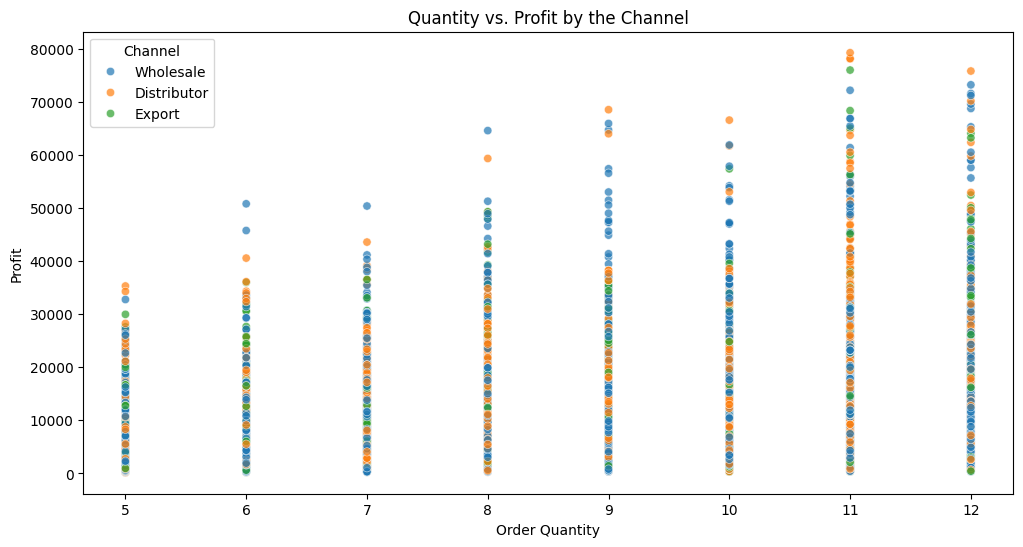

In [ ]:
# Relationship between the Product Sold Quantity and Profit of Each Channel
plt.figure(figsize = (12, 6))
sns.scatterplot(data = sales, x = 'Order Quantity', y = 'Profit', hue = 'Channel', alpha = 0.7)
plt.title("Quantity vs. Profit by the Channel")
plt.show()

In [ ]:
sales['OrderDate'].dt.year.unique()

array([2017, 2018, 2019], dtype=int32)

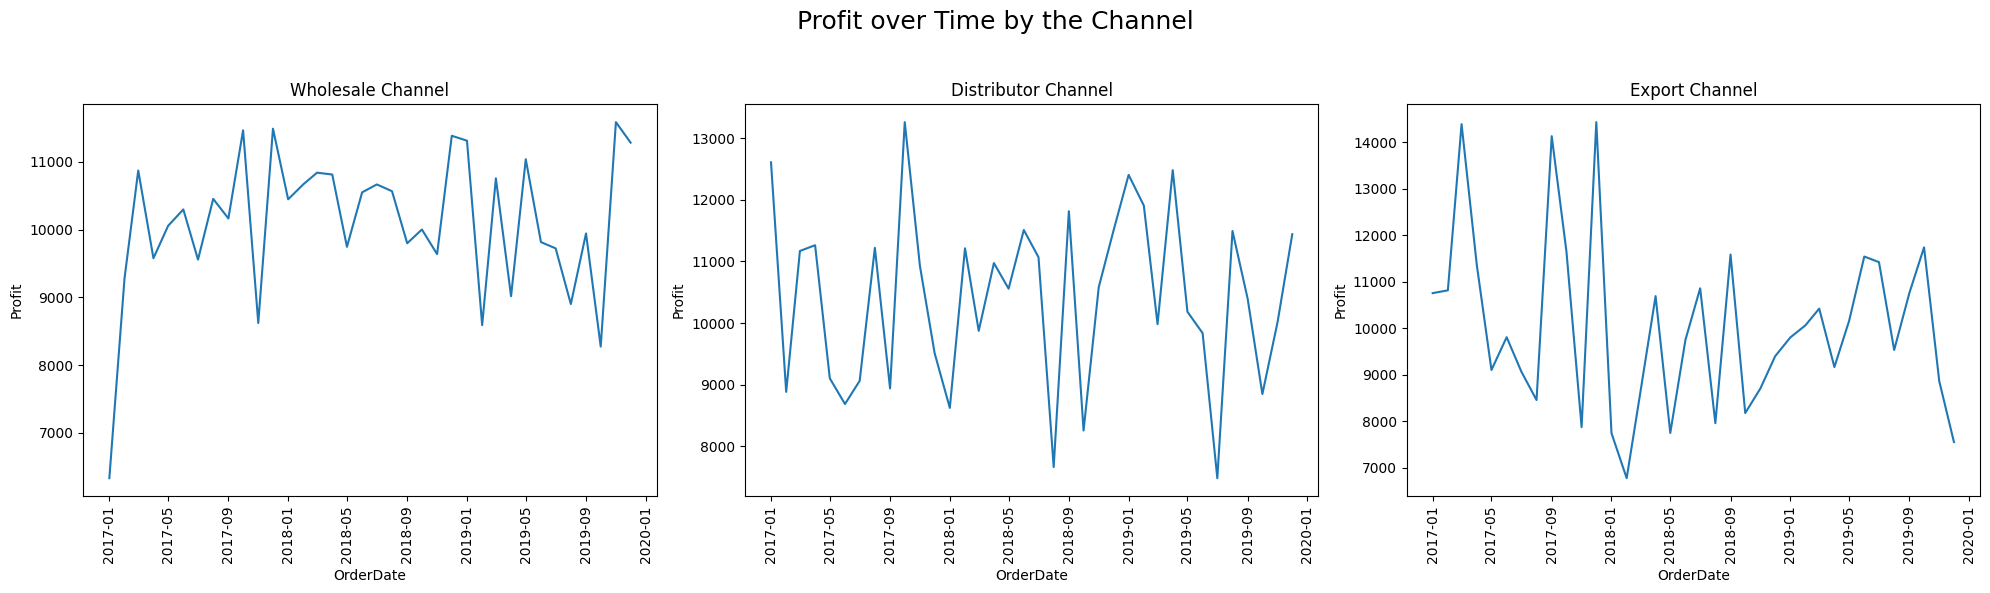

In [ ]:
# Profit Trends Visualization
fig, ax = plt.subplots(1, 3, figsize = (20, 6))

# Plot for each channel
channels = ['Wholesale', 'Distributor', 'Export']
titles = ['Wholesale Channel', 'Distributor Channel', 'Export Channel']

for i, channel in enumerate(channels):
    sns.lineplot(
        data=sales[sales['Channel'] == channel],
        x=sales['OrderDate'].dt.to_period('M').dt.start_time, # get the start of month
        y='Profit',
        errorbar=None,
        ax=ax[i]
    )
    ax[i].set_title(titles[i])
    ax[i].tick_params(axis='x', rotation=90)  # Rotate x-axis ticks

plt.suptitle(f"Profit over Time by the Channel", fontsize = 18)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()

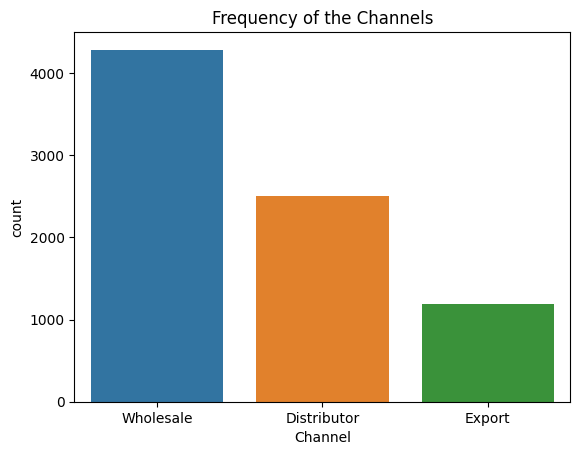

In [ ]:
sns.countplot(data = sales, x = 'Channel', hue = 'Channel', legend = False)
plt.title('Frequency of the Channels')
plt.show()

In [ ]:
sales.head()

,OrderNumber,OrderDate,Ship Date,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Total Unit Cost,Total Revenue,Customer Names,Product Name,Suburb,City,postcode,Longitude,Latitude,Full Address,Total Cost,Profit
0,SO - 000225,2017-01-01,2017-01-13,28,Wholesale,NZD,AXW291,71,11,6,2499.10,1824.343,14994.6,Dharma Ltd,Product 11,Wanaka,Queenstown-Lakes,9305,169.128174,-44.670586,"The Terraces, Wanaka, Queenstown-Lakes",10946.06,4048.54
1,SO - 0003378,2017-01-01,2017-01-06,7,Distributor,NZD,AXW291,54,7,11,2351.70,1269.918,25868.7,New Ltd,Product 7,Cashmere,Christchurch,8022,172.637838,-43.583878,"Victoria Park Road, Cashmere, Christchurch",13969.10,11899.60
2,SO - 0003901,2017-01-01,2017-01-05,12,Wholesale,NZD,AXW291,58,13,5,1728.60,1019.874,8643.0,Medline,Product 13,Chartwell,Hamilton,3210,175.269405,-37.759953,"Charmaine Crescent, Chartwell, Hamilton",5099.37,3543.63
3,SO - 0005126,2017-01-01,2017-01-17,5,Wholesale,NZD,AXW291,29,7,6,1711.85,1198.295,10271.1,Procter Corp,Product 7,Timaru Central,Timaru,7910,171.249248,-44.394775,"Elizabeth Place, Timaru Central, Timaru",7189.77,3081.33
4,SO - 0005614,2017-01-01,2017-01-07,27,Export,NZD,AXW291,31,6,7,2338.30,1028.852,16368.1,Wuxi Group,Product 6,Te Atatu Peninsula,Waitakere,610,174.655242,-36.843942,"Siena Place, Te Atatu Peninsula, Waitakere",7201.96,9166.14


In [ ]:
# create shipping duration column
sales['Shipping Duration'] = (sales['Ship Date'] - sales['OrderDate']).dt.days
sales[['OrderDate', 'Ship Date', 'Shipping Duration']].head()

,OrderDate,Ship Date,Shipping Duration
0,2017-01-01,2017-01-13,12
1,2017-01-01,2017-01-06,5
2,2017-01-01,2017-01-05,4
3,2017-01-01,2017-01-17,16
4,2017-01-01,2017-01-07,6


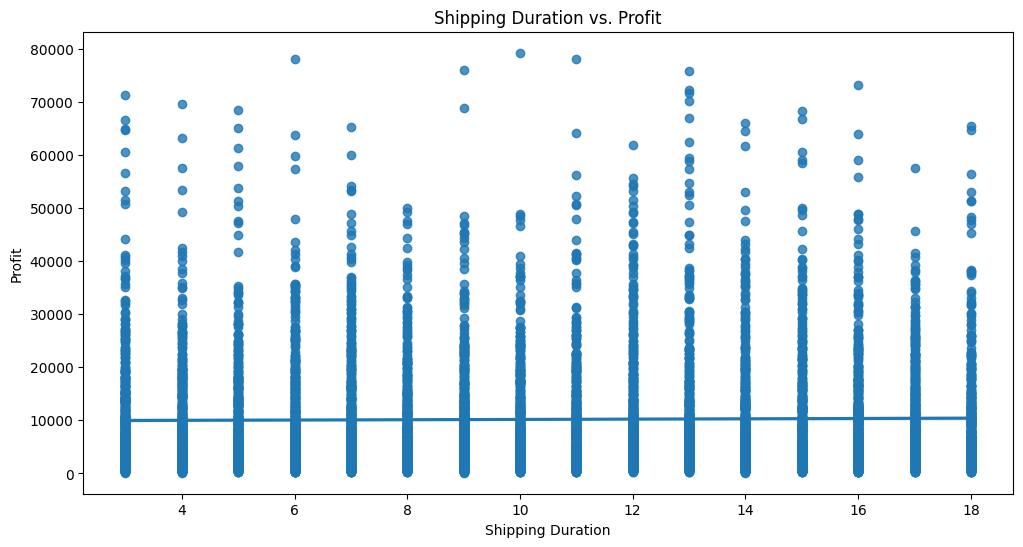

In [ ]:
plt.figure(figsize = (12, 6))
sns.regplot(data = sales, x = 'Shipping Duration', y = 'Profit')
plt.title("Shipping Duration vs. Profit")
plt.show()

In [ ]:
sales[['Shipping Duration', 'Profit']].corr()

,Shipping Duration,Profit
Shipping Duration,1.000000,0.012701
Profit,0.012701,1.000000


**There is no relationship between the Shipping Duration and Profit**

In [ ]:
sales.columns

Index(['OrderNumber', 'OrderDate', 'Ship Date', 'Customer Name Index',
       'Channel', 'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Total Unit Cost', 'Total Revenue', 'Customer Names', 'Product Name',
       'Suburb', 'City', 'postcode', 'Longitude', 'Latitude', 'Full Address',
       'Total Cost', 'Profit', 'Shipping Duration'],
      dtype='object')

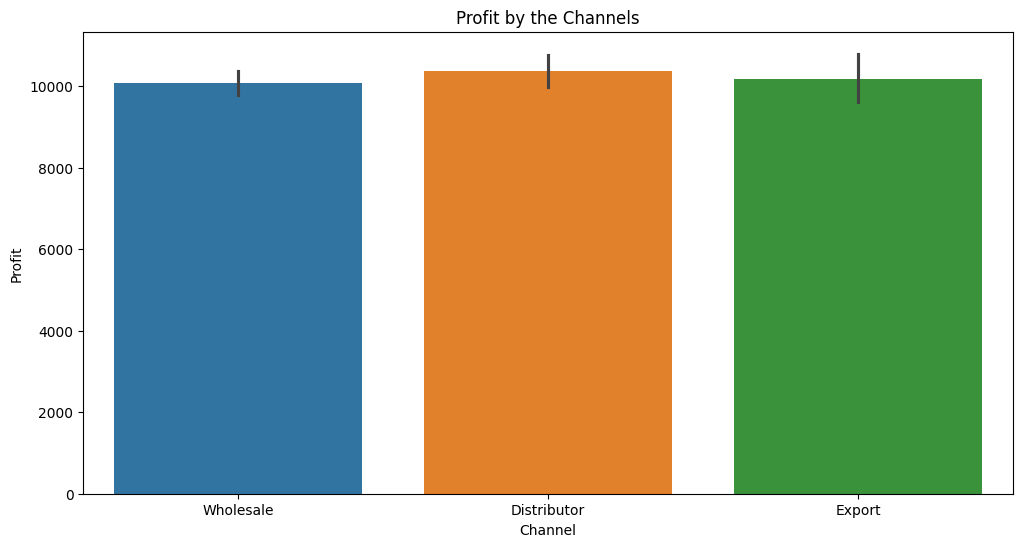

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(data = sales, x = 'Channel', y = 'Profit', hue = 'Channel', legend = False)
plt.title("Profit by the Channels")
plt.show()

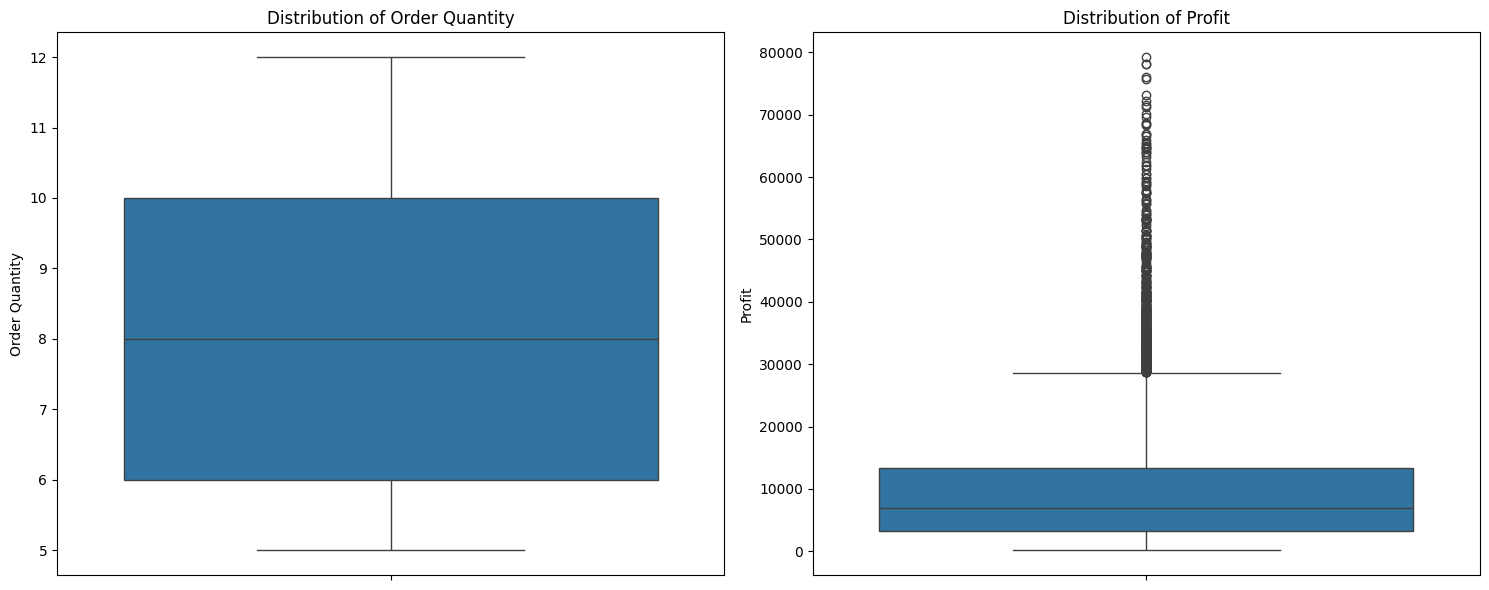

In [ ]:
# See the Distribution
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.boxplot(data = sales, y = 'Order Quantity', ax = ax[0])
ax[0].set_title('Distribution of Order Quantity')

sns.boxplot(data = sales, y = 'Profit', ax = ax[1])
ax[1].set_title('Distribution of Profit')

plt.tight_layout()
plt.show()

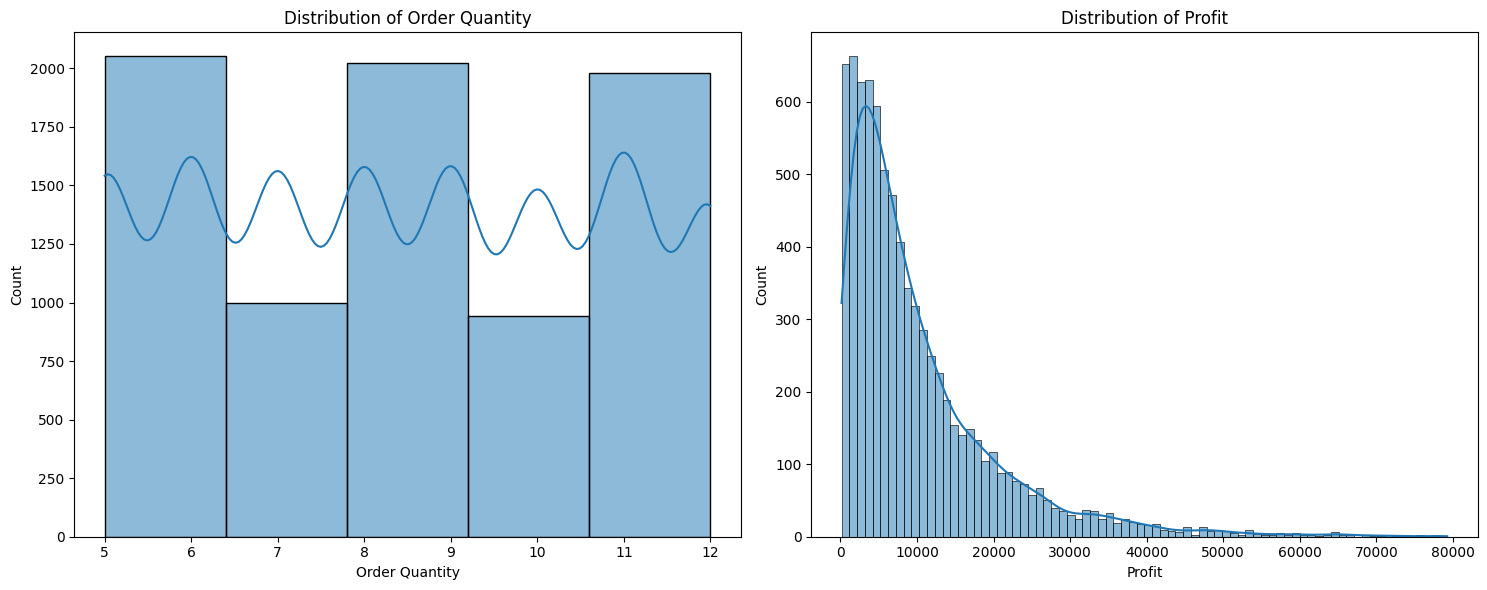

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

sns.histplot(data = sales, x = 'Order Quantity', kde = True, bins = 5, ax = ax[0])
ax[0].set_title('Distribution of Order Quantity')

sns.histplot(data = sales, x = 'Profit', kde = True, ax = ax[1])
ax[1].set_title('Distribution of Profit')

plt.tight_layout()
plt.show()

# **Store Data on Google Bigquery**

In [ ]:
# libraries that we need
from google.cloud import bigquery
from google.colab import auth

# authenticate
auth.authenticate_user()

# initialize the client for BigQuery
project_id = 'sales-data-analysis-449003'
client = bigquery.Client(project = project_id, location = 'US')

In [ ]:
# write data on bigquery
from pandas_gbq import to_gbq

# Uploading multiple DataFrames to Google BigQuery using the `to_gbq` function from `pandas_gbq`
# Each table is stored in the 'transactional_data' dataset within the specified Google Cloud project
# The `if_exists='replace'` parameter ensures that existing tables are replaced with new data

to_gbq(customers, 'transactional_data.customer_table', project_id=project_id, chunksize=None, if_exists='replace')
to_gbq(products, 'transactional_data.product_table', project_id=project_id, chunksize=None, if_exists='replace')
to_gbq(regions, 'transactional_data.region_table', project_id=project_id, chunksize=None, if_exists='replace')
to_gbq(orders, 'transactional_data.order_table', project_id=project_id, chunksize=None, if_exists='replace')
to_gbq(sales, 'transactional_data.sales_table', project_id=project_id, chunksize=None, if_exists='replace')

economy_stats.reset_index(inplace=True)
to_gbq(economy_stats, 'transactional_data.economy_stats_table', project_id=project_id, chunksize=None, if_exists='replace')

economy_correlation.reset_index(inplace=True)
to_gbq(economy_correlation, 'transactional_data.economy_correlation_table', project_id=project_id, chunksize=None, if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 834.19it/s]
